In [1]:
from MPCenv import MPCenv
from utils import make_config
from py_wake.examples.data.hornsrev1 import V80
import numpy as np

/home/marcus/miniconda3/envs/testenv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
env = MPCenv(config=make_config(),
                turbine=V80(),  # e.g., IEA37/DTU10MW WT from PyWake
                x_pos=np.array([0, 400, 800]),  # x positions of the turbines
                y_pos=np.array([0, 0, 0]),      # y positions of the turbines
                ws_scaling_min=5, ws_scaling_max=15,  # wind speed scaling
                wd_scaling_min=250, wd_scaling_max=290,  # wind direction scaling
                TI_scaling_min=0.00, TI_scaling_max=0.15,  # turbulence intensity scaling
                turbtype="None",
                dt_env=60,
                dt_sim=10,
                yaw_step_sim=10*0.3,  # 10 sim step * 0.3 (yaw actuation time)
                yaw_init='Zeros',
                )

Steady state steps: 6.0


In [3]:
obs, info = env.reset()

Steady state steps: 6.0


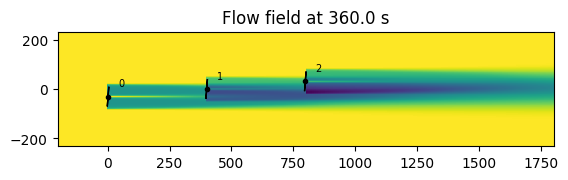

In [4]:
env.plot_farm()

In [5]:
obs, reward, terminated, truncated,  info = env.step(env.action_space.sample())

In [ ]:
info["estimated_TI"], info["estimated_ws"], info["estimated_wd"], info['optimized_yaws']

(np.float32(0.07489702), np.float32(9.291672), np.float32(253.33463))